In [1]:
# Import libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



In [2]:
# Load Comments

comments = pd.read_csv("data/comments.csv", delimiter="\t", header=None, names=["EntryID", "PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"])
print(comments.shape)
print(comments.head())


(3749891, 13)
                                             EntryID  \
0  e/ed12adf025b5491da54c4ff2c8c5377a/c/c2dbc8151...   
1  e/7f6fb13b5a99449bb9dcbb3f8693be73/c/7477fb677...   
2  e/624ca9226b6526ebdb69f9b46df482c7/c/32c6bf5bc...   
3  e/2fdf59e075094fe1847137af34eda0f7/c/eb22afe81...   
4  e/4d8de05f989d43a4b90bfbfc59751e1c/c/d472f7b81...   

                               PostID      PostedBy  SourceName  \
0  e/ed12adf025b5491da54c4ff2c8c5377a  koenigdublin         NaN   
1  e/7f6fb13b5a99449bb9dcbb3f8693be73  ilportalinux         NaN   
2  e/624ca9226b6526ebdb69f9b46df482c7    guardianuk         NaN   
3  e/2fdf59e075094fe1847137af34eda0f7          nahi  m.ctor.org   
4  e/4d8de05f989d43a4b90bfbfc59751e1c       miocaro         NaN   

                SourceURL GeoX GeoY            Timestamp  \
0                     NaN   \N   \N  2010-08-06 15:06:32   
1                     NaN   \N   \N  2010-08-06 15:06:32   
2                     NaN   \N   \N  2010-08-06 14:45:07   
3  htt

In [3]:
# Load Users

users = pd.read_csv("data/users.csv", delimiter="|", header=None, names=["ID", "Type", "Name", "ReservedField", "Description"], on_bad_lines='skip')
print(users.shape)
print(users.head())

(665382, 5)
                   ID  Type                       Name ReservedField  \
0               2gwsk  user                  Ming Quek      2a9209ad   
1              iroach  user                Isaac Roach      20948a19   
2           tonybraun  user                 Tony Braun      f68e8b26   
3  junknajidyahoocom1  user         Junknajid Yahoocom      98a02bb6   
4   spaceastronautics  user  Space & Astronautics News      c3178cfa   

                                         Description  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  NASA, ESA, NOAA, USGS, astronomy, space, weath...  


In [4]:
# Load Following

following = pd.read_csv("data/following.csv", delimiter="\t", header=None, names=["FollowedID", "FollowerID", "Timestamp"], on_bad_lines='skip')
print(following.shape)
print(following.head())


(19547158, 3)
      FollowedID      FollowerID                   Timestamp
0      njsinc4el    brendafranzo  2010-08-01 16:21:37.562726
1      njsinc4el       praguebob  2010-08-01 16:21:37.565893
2  zachhwilliams      hungheroic  2010-08-01 16:21:37.779807
3  zachhwilliams      ridwan2906  2010-08-01 16:21:37.780406
4  zachhwilliams  nickcodipietro  2010-08-01 16:21:37.780894


In [5]:
# Load Services -> not needed for the project

# services = pd.read_csv("data/services.csv", delimiter="|", header=None, names=["UserID", "ServiceID", "ServiceName", "ServiceURL", "UserNameOnService", "UserURLOnService"], on_bad_lines='skip')
# print(services.shape)
# print(services.head())

# # Get all distict service names
# service_names = services['ServiceName'].unique()
# print(service_names)

In [6]:
# Load Subscriptions -> not needed for the project

# subscriptions = pd.read_csv("data/subscriptions.csv", delimiter=",", header=None, names=["CreatorId", "SubscriberId"], on_bad_lines='skip')
# print(subscriptions.shape)
# print(subscriptions.head())


In [7]:
# Load Likes

likes = pd.read_csv("data/likes.csv", delimiter="\t", header=None, names=["userID", "PostID", "Timestamp"], on_bad_lines='skip')
print(likes.shape)
print(likes.head())


(798112, 3)
             userID                              PostID            Timestamp
0           yasinde  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-04-28 07:17:43
1  socialnewsturkey  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 20:10:02
2             janzu  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 19:50:57
3        mugecerman  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 19:18:38
4           miocaro  e/2d4fcaed2d2a4ac1a36571b66da3f16c  2010-03-02 17:31:31


In [8]:
# Load Entries/Posts

entries1 = pd.read_csv("data/entries1.csv", delimiter="\t", header=None, names=["PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"], on_bad_lines='skip')
entries2 = pd.read_csv("data/entries2.csv", delimiter="\t", header=None, names=["PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"], on_bad_lines='skip')
entries3 = pd.read_csv("data/entries3.csv", delimiter="\t", header=None, names=["PostID", "PostedBy", "SourceName", "SourceURL", "GeoX", "GeoY", "Timestamp", "Text", "NumImg", "ImgURL", "NumVideos", "VideosURL"], on_bad_lines='skip')
entries = pd.concat([entries1, entries2, entries3], ignore_index=True)
print(entries.shape)
print(entries.head())


(12450658, 12)
                               PostID     PostedBy             SourceName  \
0  e/29af803d670fb8d67692095f3ee623e6    newsroom1  Ottawa Citizen - News   
1  e/9c8413a376bec6389be4d46d0812c2bb  mehmetinnet           Mehmetin.Net   
2  e/2d658d97842a466a9513f587f85b0e59  mehmetergin           Mehmetin.Net   
3  e/b269ab5d56be4e5e90c1954ecc1ef63a       afriki                    NaN   
4  e/74f0a50c374a4ad6bddcbcc60c60cad9     hamsafar                    NaN   

                                 SourceURL GeoX GeoY            Timestamp  \
0  http://www.ottawacitizen.com/index.html   \N   \N  2010-08-02 18:43:10   
1                  http://www.mehmetin.net   \N   \N  2010-08-02 19:15:52   
2                 http://www.mehmetin.net/   \N   \N  2010-08-02 19:15:52   
3                                      NaN   \N   \N  2010-08-02 16:37:57   
4                                      NaN   \N   \N  2010-08-02 18:54:39   

                                                Text  NumIm

In [9]:
# Remove people with no followers and who are not following anyone
num_users = users.shape[0]
print(f"Users before filtering: {num_users}")
all_followed = set(following['FollowedID'].unique())
all_followers = set(following['FollowerID'].unique())
all_people = all_followed.union(all_followers)
print(f"People with followers or following: {len(all_people)}")
users = users[users['ID'].isin(all_people)]
num_users_after = users.shape[0]
print(f"Removed {num_users - num_users_after} users with no followers and not following anyone.")
print(f"Users after filtering: {num_users_after}")



Users before filtering: 665382
People with followers or following: 496389
Removed 160792 users with no followers and not following anyone.
Users after filtering: 504590


In [10]:


def print_stats(data_series, description):
    """Calculates and prints key statistics for a pandas Series."""
    print(f"--- {description} ---")
    if data_series.empty:
        print("No data available to calculate statistics.\n")
        return
    print(f"Average: {data_series.mean():.2f}")
    print(f"Median: {data_series.median():.2f}")
    print(f"Standard Deviation: {data_series.std():.2f}")
    print(f"Min: {data_series.min()}")
    print(f"Max: {data_series.max()}")
    print("-" * (len(description) + 8) + "\n")

# --- Follower Count ---
follower_count = following['FollowedID'].value_counts()
print_stats(follower_count, "Follower Count per User")

# --- Following Count ---
following_count = following['FollowerID'].value_counts()
print_stats(following_count, "Following Count per User")

# --- Posts Created ---
posts_created = entries['PostedBy'].value_counts()
print_stats(posts_created, "Posts Created per User")

# --- Likes Received per Post ---
likes_per_post = likes.groupby('PostID').size().rename('LikesCount')
posts_with_likes = entries.merge(likes_per_post, on='PostID', how='left')
posts_with_likes['LikesCount'] = posts_with_likes['LikesCount'].fillna(0)
avg_likes_received = posts_with_likes.groupby('PostedBy')['LikesCount'].mean()
print_stats(avg_likes_received, "Likes Received per Post per User")

# --- Likes Given ---
likes_given = likes['userID'].value_counts()
print_stats(likes_given, "Likes Given per User")

# --- Comments Received per Post ---
comments_per_post = comments.groupby('PostID').size().rename('CommentsCount')
posts_with_comments = entries.merge(comments_per_post, on='PostID', how='left')
posts_with_comments['CommentsCount'] = posts_with_comments['CommentsCount'].fillna(0)
avg_comments_received = posts_with_comments.groupby('PostedBy')['CommentsCount'].mean()
print_stats(avg_comments_received, "Comments Received per Post per User")

# --- Comments Given ---
comments_given = comments['PostedBy'].value_counts()
print_stats(comments_given, "Comments Given per User")

--- Follower Count per User ---
Average: 96.70
Median: 20.00
Standard Deviation: 380.44
Min: 1
Max: 43222
-------------------------------

--- Following Count per User ---
Average: 43.04
Median: 4.00
Standard Deviation: 534.28
Min: 1
Max: 74522
--------------------------------

--- Posts Created per User ---
Average: 48.53
Median: 8.00
Standard Deviation: 433.89
Min: 1
Max: 166965
------------------------------

--- Likes Received per Post per User ---
Average: 0.04
Median: 0.00
Standard Deviation: 0.63
Min: 0.0
Max: 180.71428571428572
----------------------------------------

--- Likes Given per User ---
Average: 34.89
Median: 3.00
Standard Deviation: 213.05
Min: 1
Max: 25224
----------------------------

--- Comments Received per Post per User ---
Average: 0.20
Median: 0.00
Standard Deviation: 1.69
Min: 0.0
Max: 279.1518987341772
-------------------------------------------

--- Comments Given per User ---
Average: 69.38
Median: 4.00
Standard Deviation: 339.45
Min: 1
Max: 29348
------

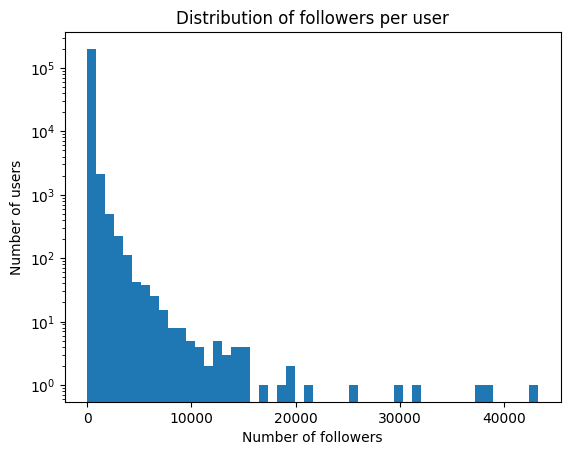

Most followed users:
FollowedID
mashable           43222
leolaporte         38260
barackobama        37400
kevinrose          31696
veronicabelmont    29441
Name: count, dtype: int64


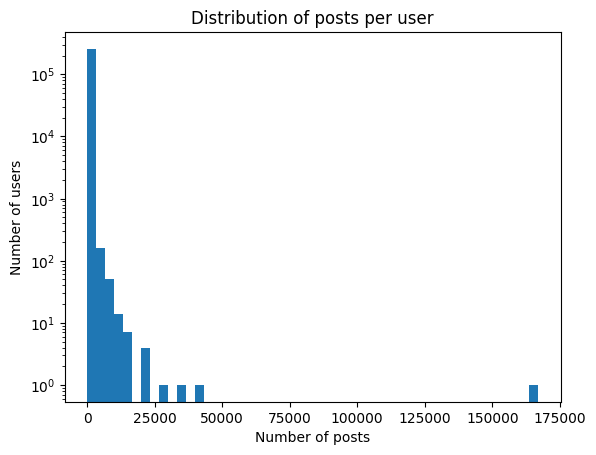

Most active users:
PostedBy
musiclion          166965
jairmorselli        40377
twibfeed            35411
sidepodcastlive     29351
newbook             22878
Name: count, dtype: int64


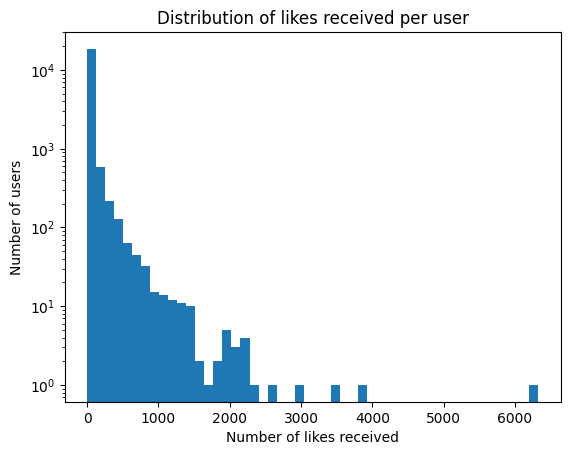

Users with most likes received:
PostedBy
jade0307      6325
mimyusof      3907
ciaotokio     3492
conformist    3036
flo14wer      2644
dtype: int64


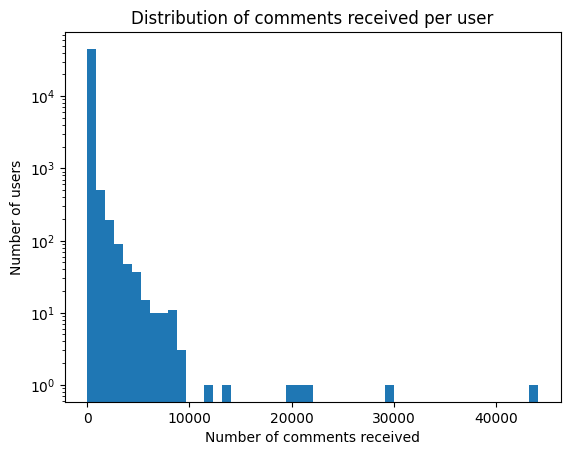

Users with most comments received:
PostedBy_poster
moni81             44106
sidepodcastlive    29348
miladabadan        21344
aynebilim          20312
wishiwerel33t      19619
dtype: int64


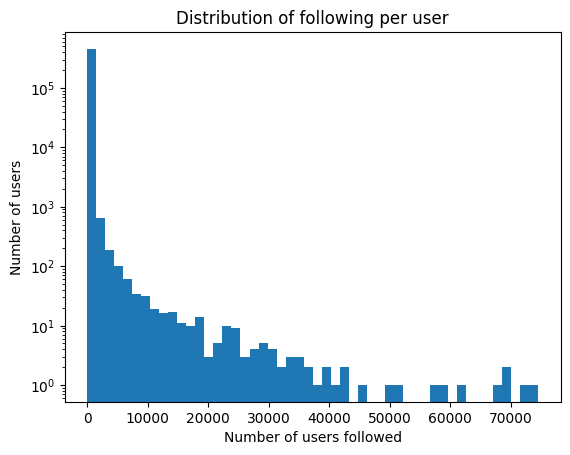

Users who follow the most other users:
FollowerID
br3adman        74522
malikimran      72064
malikimrana1    69649
sonergonul      68620
phasuk111       67414
Name: count, dtype: int64


In [11]:
# Create some plots

# Followers per user
most_followed = following['FollowedID'].value_counts()
plt.hist(most_followed, bins=50)
plt.yscale('log')
plt.xlabel('Number of followers')
plt.ylabel('Number of users')
plt.title('Distribution of followers per user')
plt.savefig('results/followers_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Most followed users:")
print(most_followed.head(5))

# Posts per user
most_active = entries['PostedBy'].value_counts()
plt.hist(most_active, bins=50)
plt.yscale('log')
plt.xlabel('Number of posts')
plt.ylabel('Number of users')
plt.title('Distribution of posts per user')
plt.savefig('results/posts_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Most active users:")
print(most_active.head(5))

# Likes received per user
likes_received = likes.merge(entries, on='PostID').groupby('PostedBy').size().sort_values(ascending=False)
plt.hist(likes_received, bins=50)
plt.yscale('log')
plt.xlabel('Number of likes received')
plt.ylabel('Number of users')
plt.title('Distribution of likes received per user')
plt.savefig('results/likes_received_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Users with most likes received:")
print(likes_received.head(5))

# Comments received per user
comments_entries_merged = comments.merge(entries, on='PostID', suffixes=('_commenter', '_poster'))
comments_received = comments_entries_merged.groupby('PostedBy_poster').size().sort_values(ascending=False)
plt.hist(comments_received, bins=50)
plt.yscale('log')
plt.xlabel('Number of comments received')
plt.ylabel('Number of users')
plt.title('Distribution of comments received per user')
plt.savefig('results/comments_received_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Users with most comments received:")
print(comments_received.head(5))

# Following per user
most_following = following['FollowerID'].value_counts()
plt.hist(most_following, bins=50)
plt.yscale('log')
plt.xlabel('Number of users followed')
plt.ylabel('Number of users')
plt.title('Distribution of following per user')
plt.savefig('results/following_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Users who follow the most other users:")
print(most_following.head(5))



In [ ]:
# Outlier detection preparation of features for each user

from sklearn.preprocessing import StandardScaler

follower_count.name = 'FollowerCount'
following_count.name = 'FollowingCount'
posts_created.name = 'PostsCreated'
avg_likes_received.name = 'AvgLikesReceived'
likes_given.name = 'LikesGiven'
avg_comments_received.name = 'AvgCommentsReceived'
comments_given.name = 'CommentsGiven'

feature_list = [
    follower_count,
    following_count,
    posts_created,
    avg_likes_received,
    likes_given,
    avg_comments_received,
    comments_given
]
anomaly_user_df = pd.concat(feature_list, axis=1).fillna(0)
anomaly_user_df.index.name = 'UserID'

scaler = StandardScaler()

scaled_features = scaler.fit_transform(anomaly_user_df)

scaled_anomaly_df = pd.DataFrame(scaled_features,
                                 index=anomaly_user_df.index,
                                 columns=anomaly_user_df.columns)


print("\n--- Verification: Check Mean and Standard Deviation of Scaled Data ---")
print(scaled_anomaly_df.describe().loc[['mean', 'std']])


--- Verification: Check Mean and Standard Deviation of Scaled Data ---
      FollowerCount  FollowingCount  PostsCreated  AvgLikesReceived  \
mean  -5.143018e-17        0.000000 -2.488557e-18     -1.493134e-17   
std    1.000001e+00        1.000001  1.000001e+00      1.000001e+00   

        LikesGiven  AvgCommentsReceived  CommentsGiven  
mean -5.910324e-18        -2.073798e-18   4.199440e-18  
std   1.000001e+00         1.000001e+00   1.000001e+00  


: 

In [ ]:
# Outlier detection using different algorithms:


from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.cluster import MiniBatchKMeans

# This hyperparameter defines the percentage of data points you expect to be outliers.
# It's a critical parameter to tune based on your domain knowledge.
CONTAMINATION_RATE = 0.05 

# Dictionary to store the results from each algorithm
outlier_results = {}

## 1. Statistical-based Approach: Multivariate Gaussian
print("1. Running Multivariate Gaussian (Elliptic Envelope)...")
# This method assumes the regular data comes from a Gaussian distribution and finds
# points that have a low probability of belonging to it (high Mahalanobis distance).
model = EllipticEnvelope(contamination=CONTAMINATION_RATE,support_fraction=0.9, random_state=42)
predictions = model.fit_predict(scaled_anomaly_df)
outliers_indices = np.where(predictions == -1)[0]
outlier_results['MultivariateGaussian'] = scaled_anomaly_df.index[outliers_indices].tolist()



## 2. Clustering-based Approach: MiniBatchKMeans
print("2. Running Clustering-based (MiniBatchKMeans)...")
# MiniBatchKMeans is much more scalable than DBSCAN for large datasets.
# We identify outliers as points with the largest distance to their cluster centroid.
n_clusters = 20 # The number of clusters is a hyperparameter to tune
model = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
model.fit(scaled_anomaly_df)

# Calculate the distance of each point to its assigned cluster's center
distances_to_center = np.linalg.norm(scaled_anomaly_df - model.cluster_centers_[model.labels_], axis=1)

# Flag the top % of points with the largest distances as outliers
threshold = np.quantile(distances_to_center, 1 - CONTAMINATION_RATE)
outliers_indices = np.where(distances_to_center > threshold)[0]
outlier_results['MiniBatchKMeans'] = scaled_anomaly_df.index[outliers_indices].tolist()

## 3. Distance-based Approach: Largest Distances
print("3. Running Distance-based (k-NN)...")
# This identifies outliers as points with the largest distance to their k-th nearest neighbor.
# We calculate this distance for every point and then flag the top N% as outliers.
k = 5
model = NearestNeighbors(n_neighbors=k)
model.fit(scaled_anomaly_df)
distances, _ = model.kneighbors(scaled_anomaly_df)
kth_distances = distances[:, k-1] # Distance to the k-th neighbor
threshold = np.quantile(kth_distances, 1 - CONTAMINATION_RATE)
outliers_indices = np.where(kth_distances > threshold)[0]
outlier_results['kNN_Distance'] = scaled_anomaly_df.index[outliers_indices].tolist()

## 4. Density-based Approach: LOF
print("4. Running Density-based (LOF)...")
# Local Outlier Factor (LOF) measures the local density deviation of a data point
# with respect to its neighbors. Outliers are points in much sparser regions than their neighbors.
model = LocalOutlierFactor(n_neighbors=20, contamination=CONTAMINATION_RATE, novelty=False)
predictions = model.fit_predict(scaled_anomaly_df)
outliers_indices = np.where(predictions == -1)[0]
outlier_results['LOF'] = scaled_anomaly_df.index[outliers_indices].tolist()

## 5. Isolation-based Approach: iForest
print("5. Running Isolation-based (Isolation Forest)...")
# Isolation Forest isolates observations by randomly selecting a feature and then
# randomly selecting a split value. Anomalies are easier to isolate and thus have shorter path lengths.
model = IsolationForest(contamination=CONTAMINATION_RATE, random_state=42)
predictions = model.fit_predict(scaled_anomaly_df)
outliers_indices = np.where(predictions == -1)[0]
outlier_results['IsolationForest'] = scaled_anomaly_df.index[outliers_indices].tolist()

## 6. One-Class SVM
print("6. Running One-Class SVM...")
# OCSVM learns a decision boundary that encompasses the majority of the data.
# Points falling outside this boundary are considered outliers.
model = OneClassSVM(nu=CONTAMINATION_RATE, kernel="rbf", gamma="auto")
predictions = model.fit_predict(scaled_anomaly_df)
outliers_indices = np.where(predictions == -1)[0]
outlier_results['OneClassSVM'] = scaled_anomaly_df.index[outliers_indices].tolist()

## 7. Reconstruction Error Approach: PCA
print("7. Running Reconstruction Error (PCA)...")
# This approach uses PCA to project data into a lower-dimensional space and then
# projects it back. Outliers, which don't fit the main data patterns, will have a
# high reconstruction error.
n_components = 5 # Should be less than the number of features
model = PCA(n_components=n_components)
transformed = model.fit_transform(scaled_anomaly_df)
reconstructed = model.inverse_transform(transformed)
reconstruction_error = np.linalg.norm(scaled_anomaly_df - reconstructed, axis=1)
threshold = np.quantile(reconstruction_error, 1 - CONTAMINATION_RATE)
outliers_indices = np.where(reconstruction_error > threshold)[0]
outlier_results['PCA_Reconstruction'] = scaled_anomaly_df.index[outliers_indices].tolist()


# --- Aggregate and Summarize Results ---
print("\n" + "="*50)
print("--- Anomaly Detection Summary ---")

# Flatten the list of all outliers found
all_outliers = [user_id for method_outliers in outlier_results.values() for user_id in method_outliers]

# Count how many times each user was flagged as an outlier
outlier_counts = Counter(all_outliers)

# Create a summary DataFrame
summary_df = pd.DataFrame(outlier_counts.items(), columns=['UserID', 'Anomaly_Count'])
summary_df = summary_df.sort_values(by='Anomaly_Count', ascending=False).reset_index(drop=True)

print(f"\nTotal unique users flagged as outliers: {len(summary_df)}")
print("\nTop 20 most anomalous users:")
print(summary_df.head(20))

# You can also create a detailed DataFrame showing which algorithm flagged which user
detailed_summary_df = scaled_anomaly_df.copy()
for method, outliers in outlier_results.items():
    detailed_summary_df[method] = detailed_summary_df.index.isin(outliers)

detailed_summary_df['Anomaly_Count'] = detailed_summary_df.iloc[:, -len(outlier_results):].sum(axis=1)
detailed_summary_df = detailed_summary_df.sort_values(by='Anomaly_Count', ascending=False)

print("\nDetailed breakdown for users flagged by 3 or more algorithms:")
print(detailed_summary_df[detailed_summary_df['Anomaly_Count'] >= 3])

1. Running Multivariate Gaussian (Elliptic Envelope)...


/opt/anaconda3/envs/DL/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-58.947598755774685 > -118.960485044631170). You may want to try with a higher value of support_fraction (current value: 0.900).
  warnings.warn(
/opt/anaconda3/envs/DL/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-58.947598755774685 > -117.380141720433429). You may want to try with a higher value of support_fraction (current value: 0.900).
  warnings.warn(
/opt/anaconda3/envs/DL/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:185: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.811791225153243 > -120.197907842148709). You may want to try with a higher value of support_fraction (current value: 0.

2. Running Clustering-based (DBSCAN)...


In [ ]:
# show a graph of people following other people
import networkx as nx
import community as community_louvain

G = nx.from_pandas_edgelist(following, source='FollowerID', target='FollowedID', create_using=nx.DiGraph())
print(f"-> Graph created successfully.")
print(f"-> Nodes (Users): {G.number_of_nodes()}")
print(f"-> Edges (Connections): {G.number_of_edges()}")
print("-" * 30)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, node_size=10, alpha=0.3, arrows=False)
plt.title('Follower Network')
plt.savefig('results/follower_network.png', dpi=300, bbox_inches='tight')
plt.show()


# --- 2. Detect Communities with Louvain Algorithm (from your existing code) ---
print("Step 2: Running the Louvain algorithm...")
partition = community_louvain.best_partition(G)
print("-> Community detection complete.")
print("-" * 30)

# --- 3. Analyze and Process the Results (from your existing code) ---
print("Step 3: Analyzing community results...")
num_communities = len(set(partition.values()))
print(f"-> Discovered {num_communities} distinct communities.")
partition_df = pd.DataFrame(list(partition.items()), columns=['ID', 'CommunityID'])
community_sizes = partition_df['CommunityID'].value_counts().reset_index()
community_sizes.columns = ['CommunityID', 'NumberOfMembers']
print("\nTop 10 Largest Social Circles:")
print(community_sizes.head(10).to_string(index=False))
print("-" * 30)

# --- 4. Merge and Save Results (from your existing code) ---
print("Step 4: Merging and saving results...")
users_with_communities = pd.merge(users, partition_df, on='ID', how='inner')
output_filepath = "results/users_with_communities.csv"
users_with_communities.to_csv(output_filepath, index=False, encoding='utf-8')
print(f"-> Successfully saved results to '{output_filepath}'")
print("-" * 30)

# --- 5. Display a Sample from the Largest Community (from your existing code) ---
if not community_sizes.empty:
    largest_community_id = community_sizes.iloc[0]['CommunityID']
    print(f"Step 5: Sample of users from the largest community (ID: {largest_community_id}):")
    largest_community_members = users_with_communities[
        users_with_communities['CommunityID'] == largest_community_id
    ]
    print(largest_community_members[['ID', 'Name', 'CommunityID']].head(15).to_string(index=False))
else:
    print("No communities were found to display a sample.")
print("-" * 30)


# --- 6. NEW: Plot Degree Distribution ---
print("Step 6: Generating Degree Distribution Plot...")
# Get the degree (number of connections) for each node
degrees = [G.degree(n) for n in G.nodes()]

# Create the plot
plt.figure(figsize=(12, 7))
plt.hist(degrees, bins=100, log=True, color='skyblue', ec='black')
plt.title('Degree Distribution of the Social Network (Log Scale)', fontsize=16)
plt.xlabel('Degree (Number of Connections)', fontsize=12)
plt.ylabel('Number of Users (Log Scale)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot to a file
degree_plot_path = 'results/degree_distribution.png'
plt.savefig(degree_plot_path)
print(f"-> Degree distribution plot saved to '{degree_plot_path}'")
plt.show() # Display the plot in the notebook
print("-" * 30)


# --- 7. NEW: Visualize the Largest Community ---
print(f"Step 7: Visualizing the largest community (ID: {largest_community_id})...")

# Extract nodes that belong to the largest community
nodes_in_community = [
    n for n, c_id in partition.items() if c_id == largest_community_id
]

# Create a subgraph containing only the nodes and edges from that community
subgraph = G.subgraph(nodes_in_community)
print(f"-> Largest community has {subgraph.number_of_nodes()} members.")

# For clarity, we'll only draw a sample if the community is too large
if subgraph.number_of_nodes() > 200:
    print("-> Community is too large to draw clearly. A random sample of 200 nodes will be visualized.")
    # Take a random sample of nodes from the subgraph
    sampled_nodes = pd.Series(list(subgraph.nodes())).sample(200, random_state=42).tolist()
    # Create the final subgraph for visualization from the sample
    vis_subgraph = subgraph.subgraph(sampled_nodes)
else:
    vis_subgraph = subgraph

# Draw the graph
plt.figure(figsize=(15, 15))
# Use a spring layout for a more organic look
pos = nx.spring_layout(vis_subgraph, seed=42, k=0.15)

# Draw nodes and edges
nx.draw_networkx_nodes(vis_subgraph, pos, node_size=50, node_color='lightgreen', alpha=0.9)
nx.draw_networkx_edges(vis_subgraph, pos, width=0.5, alpha=0.3, edge_color='gray')

plt.title(f'Visualization of Largest Social Circle (Community ID: {largest_community_id})', fontsize=20)
plt.axis('off') # Hide the axes

# Save the visualization to a file
community_plot_path = 'results/largest_community_graph.png'
plt.savefig(community_plot_path)
print(f"-> Community graph saved to '{community_plot_path}'")
plt.show() # Display the plot in the notebook
print("-" * 30)


In [ ]:
import pandas as pd

TOP_N_COMMUNITIES = 10



def print_stats(data_series, description):
    """Calculates and prints key statistics for a pandas Series."""
    print(f"--- {description} ---")
    if data_series.empty:
        print("No data available to calculate statistics.")
    else:
        print(f"Average: {data_series.mean():.2f}")
        print(f"Median: {data_series.median():.2f}")
        print(f"Standard Deviation: {data_series.std():.2f}")
        print(f"Min: {data_series.min()}")
        print(f"Max: {data_series.max()}")
    print("-" * (len(description) + 8) + "\n")

top_communities = users_with_communities['CommunityID'].value_counts().nlargest(TOP_N_COMMUNITIES).index

for community_id in top_communities:
    print(f"=============================================")
    print(f"      ANALYZING COMMUNITY ID: {community_id}")
    print(f"=============================================\n")

    # 1. Get all user IDs for the current community
    community_members = users_with_communities[users_with_communities['CommunityID'] == community_id]['ID']

    # 2. Filter the main dataframes for members of this community
    following_c = following[following['FollowerID'].isin(community_members) | following['FollowedID'].isin(community_members)]
    entries_c = entries[entries['PostedBy'].isin(community_members)]
    likes_c = likes[likes['userID'].isin(community_members)]
    comments_c = comments[comments['PostedBy'].isin(community_members)]

    # --- Follower Count ---
    follower_count = following_c[following_c['FollowedID'].isin(community_members)]['FollowedID'].value_counts()
    print_stats(follower_count, f"Follower Count (Community {community_id})")

    # --- Following Count ---
    following_count = following_c[following_c['FollowerID'].isin(community_members)]['FollowerID'].value_counts()
    print_stats(following_count, f"Following Count (Community {community_id})")

    # --- Posts Created ---
    posts_created = entries_c['PostedBy'].value_counts()
    print_stats(posts_created, f"Posts Created (Community {community_id})")

    # --- Likes Received on Average per Post ---
    if not entries_c.empty:
        likes_per_post = likes.groupby('PostID').size().rename('LikesCount')
        posts_with_likes = entries_c.merge(likes_per_post, on='PostID', how='left').fillna(0)
        avg_likes_received = posts_with_likes.groupby('PostedBy')['LikesCount'].mean()
        print_stats(avg_likes_received, f"Avg. Likes Received per Post (Community {community_id})")
    else:
        print_stats(pd.Series(), f"Avg. Likes Received per Post (Community {community_id})")


    # --- Likes Given ---
    likes_given = likes_c['userID'].value_counts()
    print_stats(likes_given, f"Likes Given (Community {community_id})")

    # --- Comments Received on Average per Post ---
    if not entries_c.empty:
        comments_per_post = comments.groupby('PostID').size().rename('CommentsCount')
        posts_with_comments = entries_c.merge(comments_per_post, on='PostID', how='left').fillna(0)
        avg_comments_received = posts_with_comments.groupby('PostedBy')['CommentsCount'].mean()
        print_stats(avg_comments_received, f"Comments Received per Post (Community {community_id})")
    else:
        print_stats(pd.Series(), f"Comments Received per Post (Community {community_id})")

    # --- Comments Given ---
    comments_given = comments_c['PostedBy'].value_counts()
    print_stats(comments_given, f"Comments Given (Community {community_id})")


